colab:

https://colab.research.google.com/drive/1HOrchXf_eDUol6qGLu6vOd9UOlbY6u4L?usp=sharing


video link:

https://drive.google.com/file/d/1za7OUhoclR2nIw6ek1B6vZg4Q9hfOX_x/view?usp=sharing


In [ ]:
import torch
import torch.nn as nn
import torchvision # for dataset
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([100, 1, 28, 28]) torch.Size([100])


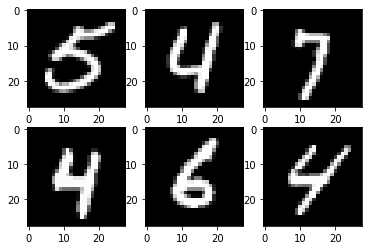

In [ ]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 100
# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True) 
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False) # shuffle in test_dataset doesnt matter for evaluation

# one batch of data
examples = iter(train_loader)     # objects
samples, labels = examples.next() # unpack examples

print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray') # cmap: color map
plt.show()

# Image Classification by NN



In [ ]:
# define hyper parameters
input_size = 784 # image size in MNIST 28*28
hidden_size = 1000
num_class = 10
num_epoch = 2
batch_size = 100
learning_rate = 0.001
# create our network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_class): # num_class = output size
        super(NeuralNet, self).__init__()
        # our layers
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_class)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out # dont use softmax for CrossEntropyloss

model = NeuralNet(input_size,hidden_size,num_class)
model.to(device)

NeuralNet(
  (l1): Linear(in_features=784, out_features=1000, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=1000, out_features=10, bias=True)
)

In [ ]:
# loss and optimizer
criterion = nn.CrossEntropyLoss() # dont use softmax
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        lables = labels.to(device)

        # forward pass and loss
        outputs = model(images)
        loss = criterion(outputs, lables)

        # backward pass
        loss.backward()
        optimizer.step()

        optimizer.zero_grad()
        
        # print the loss
        if (i+1)%100 ==0:
            print(f"epoch: {epoch+1} / {num_epoch} , step {i+1}/{n_total_steps}, loss = {loss.item():.5f}")


epoch: 1 / 2 , step 100/600, loss = 0.26222
epoch: 1 / 2 , step 200/600, loss = 0.31765
epoch: 1 / 2 , step 300/600, loss = 0.10392
epoch: 1 / 2 , step 400/600, loss = 0.12050
epoch: 1 / 2 , step 500/600, loss = 0.15429
epoch: 1 / 2 , step 600/600, loss = 0.13675
epoch: 2 / 2 , step 100/600, loss = 0.08711
epoch: 2 / 2 , step 200/600, loss = 0.10380
epoch: 2 / 2 , step 300/600, loss = 0.07455
epoch: 2 / 2 , step 400/600, loss = 0.12152
epoch: 2 / 2 , step 500/600, loss = 0.21807
epoch: 2 / 2 , step 600/600, loss = 0.04230


In [ ]:
for i in model.parameters():
    print(i.is_cuda)

False
False
False
False


In [ ]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, prediction = torch.max(outputs, 1) # along the dimension 1
        n_samples += labels.shape[0]
        n_correct += (prediction == labels).sum().item()

    acc = 100*(n_correct / n_samples)
    print(f"accuracy = {acc}")

accuracy = 97.45


# Image classification by torch.nn.RNN

https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN

In [ ]:
# define hyper parameters
# input_size = 784 # image size in MNIST 28*28
input_size = 28 #
sequence_lenght = 28 #
# hidden_size = 1000
hidden_size = 128 #
num_class = 10
num_epoch = 2
batch_size = 100
learning_rate = 0.001
num_layers = 2 # new

In [ ]:
# create our network
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_class): # num_class = output size
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers,batch_first=True) # -> [batch_size, sequence, input_size]
        self.fc = nn.Linear(hidden_size, num_class)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # check doc
        out, _ = self.rnn(x, h0)  # batch_size, sequence_length, hidden_size
        # out [N, 28, 128]
        out = out[:,-1,:]
        # out [N, 128]
        out = self.fc(out)
        return out


model = RNN(input_size, hidden_size, num_layers, num_class)
model.to(device)

RNN(
  (rnn): RNN(28, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# loss and optimizer
criterion = nn.CrossEntropyLoss() # dont use softmax
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        #images = images.reshape(-1, 28*28).to(device)
        #now i want [100,28,28]
        images = images.reshape(-1, input_size, sequence_lenght).to(device)
        lables = labels.to(device)

        # forward pass and loss
        outputs = model(images)
        loss = criterion(outputs, lables)

        # backward pass
        loss.backward()
        optimizer.step()

        optimizer.zero_grad()
        
        # print the loss
        if (i+1)%100 ==0:
            print(f"epoch: {epoch+1} / {num_epoch} , step {i+1}/{n_total_steps}, loss = {loss.item():.5f}")


epoch: 1 / 2 , step 100/600, loss = 0.85600
epoch: 1 / 2 , step 200/600, loss = 0.84652
epoch: 1 / 2 , step 300/600, loss = 0.56267
epoch: 1 / 2 , step 400/600, loss = 0.42815
epoch: 1 / 2 , step 500/600, loss = 0.38711
epoch: 1 / 2 , step 600/600, loss = 0.37424
epoch: 2 / 2 , step 100/600, loss = 0.22124
epoch: 2 / 2 , step 200/600, loss = 0.31145
epoch: 2 / 2 , step 300/600, loss = 0.24523
epoch: 2 / 2 , step 400/600, loss = 0.17444
epoch: 2 / 2 , step 500/600, loss = 0.31065
epoch: 2 / 2 , step 600/600, loss = 0.38380


In [ ]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size, sequence_lenght).to(device) #
        labels = labels.to(device)
        outputs = model(images)

        _, prediction = torch.max(outputs, 1) # along the dimension 1
        n_samples += labels.shape[0]
        n_correct += (prediction == labels).sum().item()

    acc = 100*(n_correct / n_samples)
    print(f"accuracy = {acc}")

accuracy = 92.91


# image classification by nn.gru

https://pytorch.org/docs/stable/generated/torch.nn.GRU.html#torch.nn.GRU

In [ ]:
# define hyper parameters
# input_size = 784 # image size in MNIST 28*28
input_size = 28
sequence_lenght = 28
# hidden_size = 1000
hidden_size = 128
num_class = 10
num_epoch = 2
batch_size = 100
learning_rate = 0.001
num_layers = 2 # new

In [ ]:
# create our network
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_class): # num_class = output size
        super(GRU, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, num_layers,batch_first=True) # -> [batch_size, sequence, input_size]
        self.fc = nn.Linear(hidden_size, num_class)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # check doc
        out, _ = self.gru(x, h0)  # batch_size, sequence_length, hidden_size
        # out [N, 28, 128]
        out = out[:,-1,:]
        # out [N, 128]
        out = self.fc(out)
        return out


model = GRU(input_size, hidden_size, num_layers, num_class)
model.to(device)

GRU(
  (gru): GRU(28, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# loss and optimizer
criterion = nn.CrossEntropyLoss() # dont use softmax
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        #images = images.reshape(-1, 28*28).to(device)
        #now i want [100,28,28]
        images = images.reshape(-1, input_size, sequence_lenght).to(device)
        lables = labels.to(device)

        # forward pass and loss
        outputs = model(images)
        loss = criterion(outputs, lables)

        # backward pass
        loss.backward()
        optimizer.step()

        optimizer.zero_grad()
        
        # print the loss
        if (i+1)%100 ==0:
            print(f"epoch: {epoch+1} / {num_epoch} , step {i+1}/{n_total_steps}, loss = {loss.item():.5f}")


epoch: 1 / 2 , step 100/600, loss = 0.75713
epoch: 1 / 2 , step 200/600, loss = 0.44392
epoch: 1 / 2 , step 300/600, loss = 0.27515
epoch: 1 / 2 , step 400/600, loss = 0.14193
epoch: 1 / 2 , step 500/600, loss = 0.15414
epoch: 1 / 2 , step 600/600, loss = 0.26195
epoch: 2 / 2 , step 100/600, loss = 0.09388
epoch: 2 / 2 , step 200/600, loss = 0.07113
epoch: 2 / 2 , step 300/600, loss = 0.07838
epoch: 2 / 2 , step 400/600, loss = 0.15044
epoch: 2 / 2 , step 500/600, loss = 0.05770
epoch: 2 / 2 , step 600/600, loss = 0.09677


In [ ]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size, sequence_lenght).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, prediction = torch.max(outputs, 1) # along the dimension 1
        n_samples += labels.shape[0]
        n_correct += (prediction == labels).sum().item()

    acc = 100*(n_correct / n_samples)
    print(f"accuracy = {acc}")

accuracy = 97.78999999999999


# image classification by nn.LSTM

https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM

In [ ]:
# define hyper parameters
# input_size = 784 # image size in MNIST 28*28
input_size = 28
sequence_lenght = 28
# hidden_size = 1000
hidden_size = 128
num_class = 10
num_epoch = 2
batch_size = 100
learning_rate = 0.001
num_layers = 2 # new

In [ ]:
# create our network
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_class): # num_class = output size
        super(LSTM, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,batch_first=True) # -> [batch_size, sequence, input_size]
        self.fc = nn.Linear(hidden_size, num_class)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # check doc
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # check doc
        out, _ = self.lstm(x, (h0, c0))  # batch_size, sequence_length, hidden_size
        # out [N, 28, 128]
        out = out[:,-1,:]
        # out [N, 128]
        out = self.fc(out)
        return out


model = LSTM(input_size, hidden_size, num_layers, num_class)
model.to(device)

LSTM(
  (lstm): LSTM(28, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# loss and optimizer
criterion = nn.CrossEntropyLoss() # dont use softmax
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        #images = images.reshape(-1, 28*28).to(device)
        #now i want [100,28,28]
        images = images.reshape(-1, input_size, sequence_lenght).to(device)
        lables = labels.to(device)

        # forward pass and loss
        outputs = model(images)
        loss = criterion(outputs, lables)

        # backward pass
        loss.backward()
        optimizer.step()

        optimizer.zero_grad()
        
        # print the loss
        if (i+1)%100 ==0:
            print(f"epoch: {epoch+1} / {num_epoch} , step {i+1}/{n_total_steps}, loss = {loss.item():.5f}")


epoch: 1 / 2 , step 100/600, loss = 0.62217
epoch: 1 / 2 , step 200/600, loss = 0.35068
epoch: 1 / 2 , step 300/600, loss = 0.28082
epoch: 1 / 2 , step 400/600, loss = 0.18165
epoch: 1 / 2 , step 500/600, loss = 0.10020
epoch: 1 / 2 , step 600/600, loss = 0.09639
epoch: 2 / 2 , step 100/600, loss = 0.18695
epoch: 2 / 2 , step 200/600, loss = 0.19678
epoch: 2 / 2 , step 300/600, loss = 0.10025
epoch: 2 / 2 , step 400/600, loss = 0.06461
epoch: 2 / 2 , step 500/600, loss = 0.15277
epoch: 2 / 2 , step 600/600, loss = 0.08720


In [ ]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size, sequence_lenght).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, prediction = torch.max(outputs, 1) # along the dimension 1
        n_samples += labels.shape[0]
        n_correct += (prediction == labels).sum().item()

    acc = 100*(n_correct / n_samples)
    print(f"accuracy = {acc}")

accuracy = 97.65


Email: arash.lagzian94@gmail.com